# dynamic Bayesian Networks with pyAgrum

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

### Building a 2TBN

Note the naming convention for dBN : a variable with a name $A$ is present at t=0 with the name $A0$ and at time t as $At$.

In [2]:
dbn=gum.BayesNet()
a0,b0,c0,at,bt,ct=[dbn.add(gum.LabelizedVariable(s,s,6)) 
                   for s in ["a0","b0","c0","at","bt","ct"]]
d0,dt=[dbn.add(gum.LabelizedVariable(s,s,3)) 
       for s in ["d0","dt"]]

dbn.addArc(a0,b0)

dbn.addArc(c0,d0)

dbn.addArc(a0,at)
dbn.addArc(a0,bt)
dbn.addArc(a0,dt)
dbn.addArc(b0,bt)
dbn.addArc(c0,ct)
dbn.addArc(d0,ct)
dbn.addArc(d0,dt)

dbn.addArc(at,ct)
dbn.generateCPTs()

gnb.showBN(dbn)

## 2TBN

The dbn above actually is a 2TBN and is not correctly shown as a BN. Using the naming convention, it can be shown as a 2TBN.

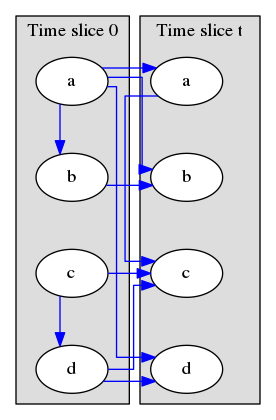

In [3]:
gdyn.showTimeSlices(dbn,format="png")

## unrolling 2TBN

A dBN is 'unrolled' using the 2TBN and the time period size.

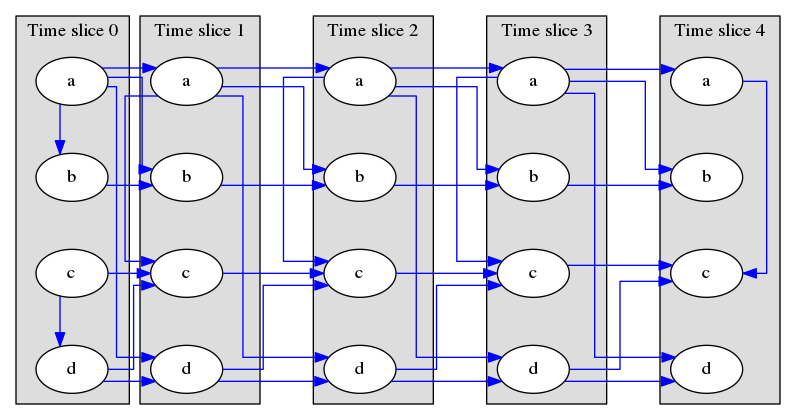

In [4]:
T=5

bn=gdyn.unroll2TBN(dbn,T)
gdyn.showTimeSlices(bn,size="10")

We can infer on bn just as on a normal bn.

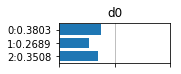

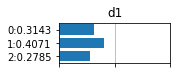

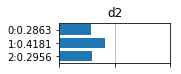

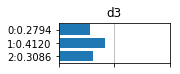

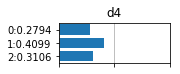

In [5]:
for i in range(T):
    gnb.showPosterior(bn,target="d{}".format(i),evs={})

## dynamic inference : following variables

In the same manner, the variables in a dbN are named using the convention $Ai$ where $i$ is the number of ther time slice.

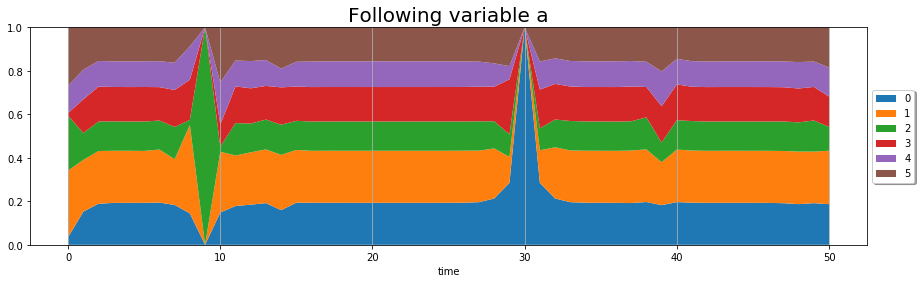

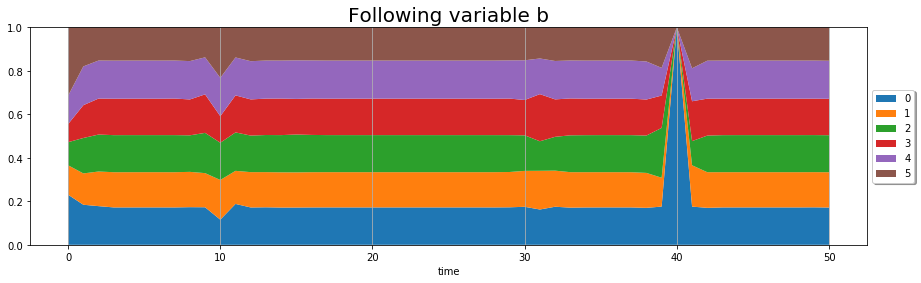

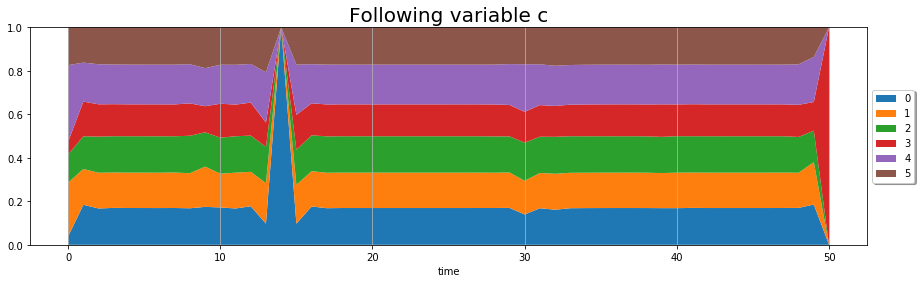

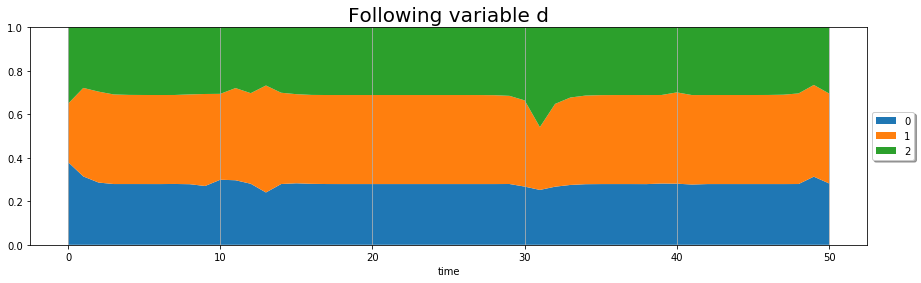

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 4)
gdyn.plotFollow(["a","b","c","d"],dbn,T=51,evs={'a9':2,'a30':0,'c14':0,'b40':0,'c50':3})  